<a href="https://colab.research.google.com/github/Dominik-Lamcha/Optimization_algorithms/blob/main/Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import arange
from numpy import meshgrid
import sympy as smp
import scipy
from scipy.misc import derivative
import datetime
from statistics import mean
import time



**Definition of function**

In [ ]:
def Rastrigin(X):
    A = 10
    return A*len(X) + sum([(x*x - A * np.cos(2 * math.pi * x)) for x in X])

def Sphere(X):
    return sum([(x*x) for x in X])

def Rosenbrock(X):
   sum=0
   n=len(X)
   for i in range(n-1):
    sum=sum+(100.0*(X[i+1] - X[i]**2.0)**2.0 + ((1 - X[i])**2.0))
   return sum

**gradient calculation**

In [ ]:
def Rastrigin_grad(X): 
  grad = []
  for x in X:
    grad.append(2*x+20*math.pi*np.sin(2*math.pi*x))
  return np.array(grad)

def Sphere_grad(X):
  grad = []
  for x in X:
    grad.append(2*x)
  return np.array(grad)
  
def Rosenbrock_grad(X):  
  grad=[]
  n=len(X)
  n_1=n-1
  for i in range(n-1):
    grad.append(-400*X[i]*(X[i+1]-X[i]**2)+2*X[i]-2)
  grad.append(200*X[n_1]-200*X[n_1-1]**2)
  return np.array(grad)


In [ ]:
def rastrigin(*X):
    A = 10
    n=len(X)
    f = A*n + sum([(x*x - A * np.cos(2 * math.pi * x)) for x in X])
    return f

def sphere(*X):
    return sum([(x*x) for x in X])
    
def rosenbrock(*X):
   sum=0
   n=len(X)
   for i in range(n-1):
    sum=sum+(100.0*(X[i+1] - X[i]**2.0)**2.0 + ((1 - X[i])**2.0))
   return sum

**Optimizer**

In [ ]:
def adam(cur_x, gradient, precision, max_iters, lr, beta1, beta2):
  iters = 0 
  previous_step_size =[0.5]
  eps = 1e-10
  
  m = np.array([0.0 for _ in range(len(cur_x))])
  v = np.array([0.0 for _ in range(len(cur_x))])
  v_hat_sqrt = np.array([0.0 for _ in range(len(cur_x))])

  start_time = time.time()

  while max(previous_step_size) > precision and iters < max_iters:

    prev_x = cur_x
    m = beta1 * m + (1.0 - beta1) * gradient(prev_x)
    v = beta2 * v + (1.0 - beta2) * gradient(prev_x)**2

    m_hat = m / (1.0 - beta1 ** (iters+1))
    v_corr = v / (1.0 - beta2 ** (iters+1))
    for i in range(len(v_corr)):
      v_hat_sqrt[i] = math.sqrt(v_corr[i])
    cur_x = prev_x - lr * m_hat / (v_hat_sqrt + eps)

    previous_step_size = abs(cur_x - prev_x)
    iters = iters+1

  stop_time=time.time()

  algorithm_time=stop_time-start_time

  return algorithm_time, cur_x

**Main**

In [ ]:
max_iters = 10000
lr = 0.001 
beta1 = 0.9 
beta2 = 0.999 

alg_time_1 = [[0]*5 for i in range(11)] 
alg_time_2 = [[0]*5 for i in range(11)]
alg_time_3 = [[0]*5 for i in range(11)]
best_result_1 = [[0] for i in range(11)]
mean_1 = [[0] for i in range(11)]
best_result_x1 = [[0] for i in range(11)]
best_result_2 = [[0] for i in range(11)]
mean_2 = [[0] for i in range(11)]
best_result_x2 = [[0] for i in range(11)]
best_result_3 = [[0] for i in range(11)]
mean_3 = [[0] for i in range(11)]
best_result_x3 = [[0] for i in range(11)]

for xi in range(11):
  xn=2**(xi+1) 
  f1_celu = [] 
  f2_celu = []
  f3_celu = []
  print(xn)


  for i in range(5):
    start_x = np.random.uniform(0,1,xn) 
    time_1 = 0
    time_2 = 0
    time_3 = 0

    x_1 = 0
    x_2 = 0
    x_3 = 0

    precision = 1e-6
    alg_time_1[xi][i],x_1=adam(start_x, Rastrigin_grad, precision, max_iters, lr, beta1, beta2)
    alg_time_2[xi][i],x_2=adam(start_x, Sphere_grad, precision, max_iters, lr, beta1, beta2)
    precision = 1e-5 
    alg_time_3[xi][i],x_3=adam(start_x, Rosenbrock_grad, precision, max_iters, lr, beta1, beta2)

    print(x_2)
    if i<1:
      all_x1 = x_1
      all_x2 = x_2
      all_x3 = x_3
    else:
      all_x1 = np.vstack((all_x1, x_1)) 
      all_x2 = np.vstack((all_x2, x_2))
      all_x3 = np.vstack((all_x3, x_3))

    f1_celu.append(Rastrigin(x_1)) 
    f2_celu.append(Sphere(x_2))
    f3_celu.append(Rosenbrock(x_3))
  best_result_1[xi] = min(f1_celu) 
  mean_1[xi] = mean(np.array(f1_celu)) 
  best_result_x1[xi] = all_x1[f1_celu.index(best_result_1[xi]),:] 

  best_result_2[xi] = min(f2_celu)
  mean_2[xi] = mean(np.array(f2_celu))
  best_result_x2[xi] = all_x2[f2_celu.index(best_result_2[xi]),:]

  best_result_3[xi] = min(f3_celu)
  mean_3[xi] = mean(np.array(f3_celu))
  best_result_x3[xi] = all_x3[f3_celu.index(best_result_3[xi]),:]



2
[6.49097089e-05 1.14550461e-04]
[1.54962002e-23 1.46458788e-04]
[8.81588821e-60 1.51901301e-04]
[1.34053813e-04 1.18661941e-27]
[1.61481281e-04 4.30171707e-13]
4
[3.50444873e-53 8.15344810e-11 1.40343105e-04 7.02605753e-05]
[1.26877461e-07 8.22908912e-66 5.59796730e-20 1.55363739e-04]
[7.46141059e-09 1.48808437e-04 6.26820128e-06 1.15578509e-55]
[-3.03391755e-27  1.86803604e-12  2.17441391e-05  7.56740565e-05]
[5.95001050e-06 9.26018300e-68 1.61019240e-04 1.11536507e-10]
8
[-2.42196668e-27  6.67551493e-07  4.21410502e-15  3.79267320e-51
  4.81186756e-08  1.54175910e-04  6.64039672e-07  3.62498386e-05]
[ 7.28651513e-15  1.54479730e-04 -2.98411338e-64  4.89626232e-05
  9.79494907e-05  2.07110255e-53  1.30028654e-08 -5.04352008e-55]
[ 1.38457265e-06  8.56162886e-54  6.71308082e-06  1.53094232e-04
 -1.73173090e-56  2.06436982e-12 -5.85037806e-63 -1.23103707e-57]
[-1.85913970e-65  2.88054549e-06  1.98740886e-06  4.13049199e-13
  3.29264574e-11  2.09966690e-21  8.06215683e-07  1.59678150e-

**Results draw**

In [ ]:
def adam_draw( gradient, funkcja, resolution, precision, max_iters, lr, beta1, beta2):

  iters = 0 
  cur_x = np.random.uniform(0,1,2)
  previous_step_size =[0.5]
  eps = 1e-8 
  
  m = np.array([0.0 for _ in range(len(cur_x))])
  v = np.array([0.0 for _ in range(len(cur_x))])
  v_corr_sqrt = np.array([0.0 for _ in range(len(cur_x))])

  X = np.linspace(-2, 2, 200)    
  Y = np.linspace(-2, 2, 200)    

  X, Y = np.meshgrid(X, Y)

  Z = funkcja(X, Y)
  Z = np.array(Z)
  Z = Z.reshape((len(X), len(Y)))

  plt.contour(X,Y,Z, resolution)

  while max(previous_step_size) > precision and iters < max_iters:

    plt.scatter(cur_x[0], cur_x[1])
    prev_x = cur_x
    m = beta1 * m + (1.0 - beta1) * gradient(prev_x)
    v = beta2 * v + (1.0 - beta2) * gradient(prev_x)**2

    m_corr = m / (1.0 - beta1 ** (iters+1))
    v_corr = v / (1.0 - beta2 ** (iters+1))
    for i in range(len(v_corr)):
      v_corr_sqrt[i] = math.sqrt(v_corr[i])
    cur_x = prev_x - lr * m_corr / (v_corr_sqrt + eps)

    previous_step_size = abs(cur_x - prev_x)
    iters = iters+1

  plt.show()
  print(cur_x)

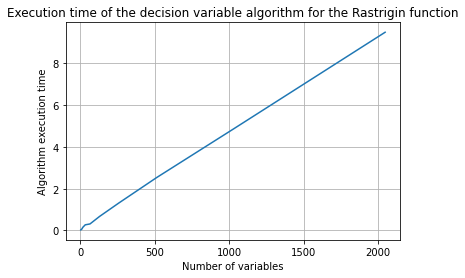

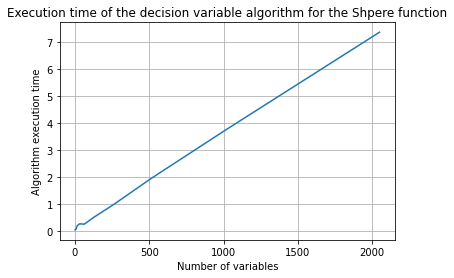

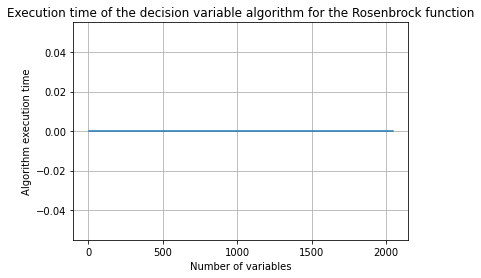

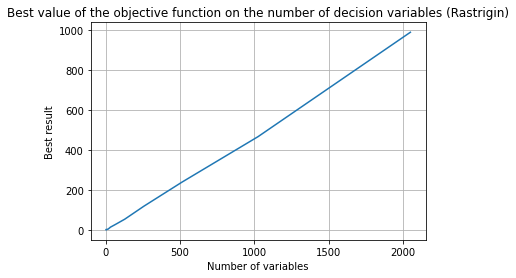

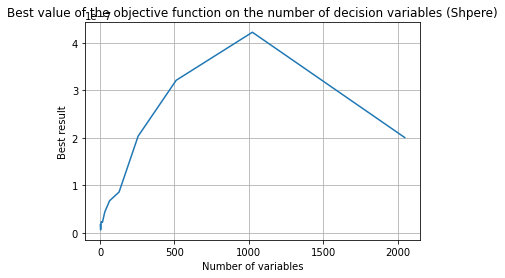

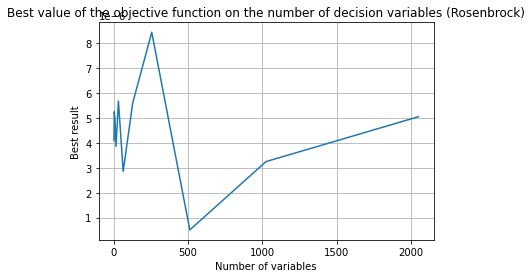

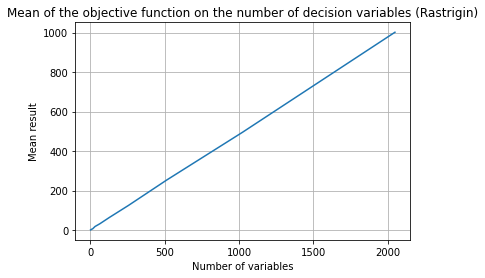

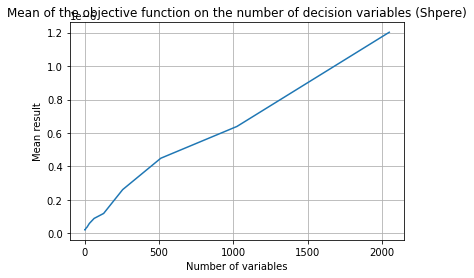

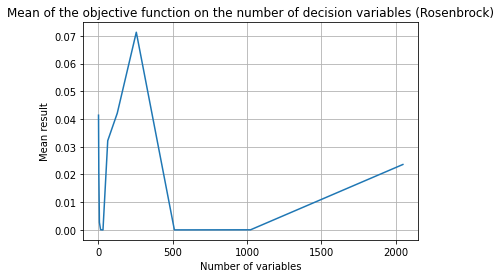

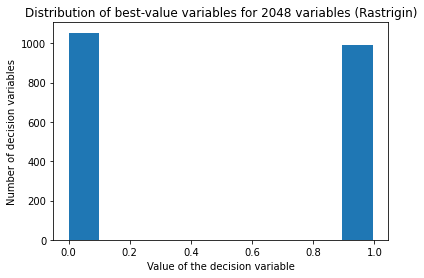

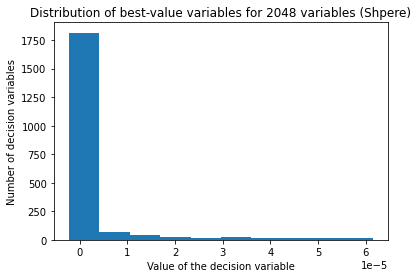

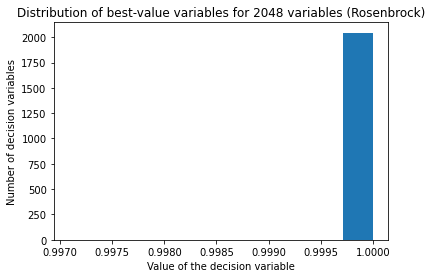

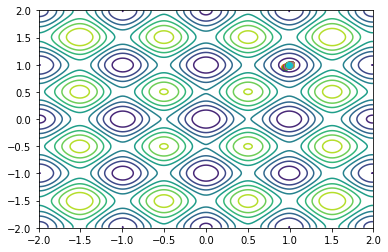

[0.99495864 0.99495864]


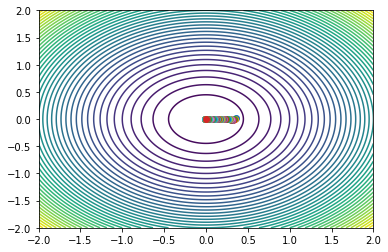

[-2.03832859e-09 -3.22700555e-11]


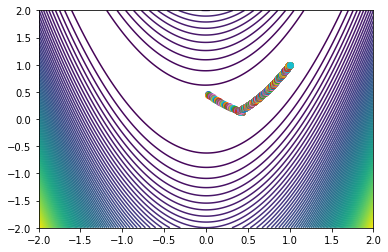

[0.99986552 0.99962957]


In [ ]:

mean_time_1=[[0] for i in range(11)]
mean_time_2=[[0] for i in range(11)]
mean_time_3=[[0] for i in range(11)]
for j in range(11):
  temp_sum_1=0
  temp_sum_2=0
  temp_sum_3=0
  for i in range(5):
    temp_sum_1=temp_sum_1+alg_time_1[j][i]
    temp_sum_2=temp_sum_2+alg_time_2[j][i]
    temp_suma_3=temp_sum_3+alg_time_3[j][i]
  mean_time_1[j]=temp_sum_1/5
  mean_time_2[j]=temp_sum_2/5
  mean_time_3[j]=temp_sum_3/5

hist1 = best_result_x1[10]
hist2 = best_result_x2[10]
hist3 = best_result_x3[10]

os_x=[[2**(i+1)] for i in range(11)]
plt.plot(os_x,mean_time_1)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Execution time of the decision variable algorithm for the Rastrigin function')
plt.grid()
plt.show()

plt.plot(os_x,mean_time_2)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Execution time of the decision variable algorithm for the Shpere function')
plt.grid()
plt.show()

plt.plot(os_x,mean_time_3)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Execution time of the decision variable algorithm for the Rosenbrock function')
plt.grid()
plt.show()

plt.plot(os_x,best_result_1)
plt.ylabel('Best result')
plt.xlabel('Number of variables')
plt.title('Best value of the objective function on the number of decision variables (Rastrigin)')
plt.grid()
plt.show()
plt.plot(os_x,best_result_2)
plt.ylabel('Best result')
plt.xlabel('Number of variables')
plt.title('Best value of the objective function on the number of decision variables (Shpere)')
plt.grid()
plt.show()
plt.plot(os_x,best_result_3)
plt.ylabel('Best result')
plt.xlabel('Number of variables')
plt.title('Best value of the objective function on the number of decision variables (Rosenbrock)')
plt.grid()
plt.show()

plt.plot(os_x,mean_1)
plt.ylabel('Mean result')
plt.xlabel('Number of variables')
plt.title('Mean of the objective function on the number of decision variables (Rastrigin)')
plt.grid()
plt.show()
plt.plot(os_x,mean_2)
plt.ylabel('Mean result')
plt.xlabel('Number of variables')
plt.title('Mean of the objective function on the number of decision variables (Shpere)')
plt.grid()
plt.show()
plt.plot(os_x,mean_3)
plt.ylabel('Mean result')
plt.xlabel('Number of variables')
plt.title('Mean of the objective function on the number of decision variables (Rosenbrock)')
plt.grid()
plt.show()

plt.hist(hist1)
plt.ylabel('Number of decision variables')
plt.xlabel('Value of the decision variable')
plt.title('Distribution of best-value variables for 2048 variables (Rastrigin)')
plt.show()
plt.hist(hist2)
plt.ylabel('Number of decision variables')
plt.xlabel('Value of the decision variable')
plt.title('Distribution of best-value variables for 2048 variables (Shpere)')
plt.show()
plt.hist(hist3)
plt.ylabel('Number of decision variables')
plt.xlabel('Value of the decision variable')
plt.title('Distribution of best-value variables for 2048 variables (Rosenbrock)')
plt.show()
lr = 0.01
beta1 = 0.9
beta2 = 0.99
max_iters = 10000

adam_draw(Rastrigin_grad, rastrigin, 10, 1e-10, max_iters, lr, beta1, beta2)
adam_draw(Sphere_grad, sphere, 50, 1e-10, max_iters, lr, beta1, beta2)
adam_draw(Rosenbrock_grad, rosenbrock, 100, 1e-5, max_iters, lr, beta1, beta2)